# MSDS 670 Final Project
Wiley Winters</br>
MSDS 670 Data Visualization</br>
2024-MAR-10</br>

---------------------------------------------------------------------
Import required packages and libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rcParams
import numpy as np

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

# Set seaborn style and autoconfig
sns.set_style('whitegrid')
rcParams.update({'figure.autolayout': True})

In [2]:
causes_df = pd.read_csv('data/NCHS_-_Leading_Causes_of_Death__United_States.csv')
causes_df.head()

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8


The `usaTotalPop` will be used later on to calculate the *crude death rate* per 100,000 people

In [3]:
total = pd.read_csv('data/usaTotalPop.csv')
total.head()

,year,population
0,1999,279040000
1,2000,282162411
2,2001,284968955
3,2002,287625193
4,2003,290107933


In [4]:
print(causes_df.info())
print('\nNaN Values:\n', causes_df.isna().sum())
print('\nDuplicates: ', causes_df.duplicated().sum())
print('\nSize: ', causes_df.size)
print('\nDistribution:\n', causes_df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10868 non-null  int64  
 1   113 Cause Name           10868 non-null  object 
 2   Cause Name               10868 non-null  object 
 3   State                    10868 non-null  object 
 4   Deaths                   10868 non-null  int64  
 5   Age-adjusted Death Rate  10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB
None

NaN Values:
 Year                       0
113 Cause Name             0
Cause Name                 0
State                      0
Deaths                     0
Age-adjusted Death Rate    0
dtype: int64

Duplicates:  0

Size:  65208

Distribution:
                            count          mean            std     min     25%  \
Year                     10868.0   2008.000000       5.477478  

Column names with spaces are a little hard to work with.  I will rename with spaces replaced by underscores `_`

In [5]:
causes_df.rename({'Year':'year', '113 Cause Name': '113_cause_name',
                 'Cause Name':'cause_name', 'State': 'state', 'Deaths':'deaths',
                 'Age-adjusted Death Rate':'age_adjusted'}, axis=1, inplace=True)
causes_df.columns

Index(['year', '113_cause_name', 'cause_name', 'state', 'deaths',
       'age_adjusted'],
      dtype='object')

---------------------------------------------------------------------
There no duplicates or missing values.  Perform some basic EDA to see what information can be gathered from the dataset

In [6]:
print('start--> ',causes_df.year.min())
print('end-->   ', causes_df.year.max())

start-->  1999
end-->    2017


In [7]:
print(causes_df['113_cause_name'].value_counts())
print(causes_df['cause_name'].value_counts())

113_cause_name
Accidents (unintentional injuries) (V01-X59,Y85-Y86)                     988
All Causes                                                               988
Alzheimer's disease (G30)                                                988
Cerebrovascular diseases (I60-I69)                                       988
Chronic lower respiratory diseases (J40-J47)                             988
Diabetes mellitus (E10-E14)                                              988
Diseases of heart (I00-I09,I11,I13,I20-I51)                              988
Influenza and pneumonia (J09-J18)                                        988
Intentional self-harm (suicide) (*U03,X60-X84,Y87.0)                     988
Malignant neoplasms (C00-C97)                                            988
Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)    988
Name: count, dtype: int64
cause_name
Unintentional injuries     988
All causes                 988
Alzheimer's disease        988
Stroke  

The `113_cause_name` and `cause_name` are basically the same just `cause_name` uses simpler language.  I will drop the `113_cause_name` column.

In [8]:
causes_df.drop('113_cause_name', axis=1, inplace=True)
causes_df.columns

Index(['year', 'cause_name', 'state', 'deaths', 'age_adjusted'], dtype='object')

In [9]:
suicide = causes_df[causes_df['cause_name'] == 'Suicide']
print('minimum --> ', suicide['deaths'].min())
print('maximum --> ', suicide['deaths'].max())

minimum -->  23
maximum -->  47173


In [10]:
print('minimum --> ', suicide['age_adjusted'].min())
print('maximum --> ', suicide['age_adjusted'].max())

minimum -->  3.8
maximum -->  29.6


In [11]:
causes_df.groupby(['year', 'state', 'cause_name']).agg({'age_adjusted':'max'}). \
                  sort_values('age_adjusted', ascending=False)

age_adjusted
year state                cause_name                  
1999 District of Columbia All causes            1087.3
2000 District of Columbia All causes            1061.2
     Mississippi          All causes            1051.9
2002 Mississippi          All causes            1051.6
2001 District of Columbia All causes            1049.9
...                                                ...
2000 District of Columbia Suicide                  3.8
2013 Vermont              Kidney disease           3.8
2016 Vermont              Kidney disease           3.7
2017 Vermont              Kidney disease           3.3
2012 Vermont              Kidney disease           2.6

[10868 rows x 1 columns]

The `All causes` record appears to be the sum of all of the other causes and is not required for my analysis.  I will remove these records.

In [12]:
causes_df = causes_df[causes_df.cause_name != 'All causes']

In [13]:
causes_df[causes_df.state == 'United States']

,year,cause_name,state,deaths,age_adjusted
0,2017,Unintentional injuries,United States,169936,49.4
104,2017,Alzheimer's disease,United States,121404,31.0
156,2017,Stroke,United States,146383,37.6
208,2017,CLRD,United States,160201,40.9
260,2017,Diabetes,United States,83564,21.5
...,...,...,...,...,...
10652,1999,Heart disease,United States,725192,266.5
10705,1999,Influenza and pneumonia,United States,63730,23.5
10757,1999,Suicide,United States,29199,10.5
10808,1999,Cancer,United States,549838,200.8


In [14]:
usa = causes_df[causes_df.state == 'United States']
usa.groupby(['year', 'state', 'cause_name']).agg({'age_adjusted':'max'}). \
              sort_values(['year', 'age_adjusted'], ascending=False)

age_adjusted
year state         cause_name                           
2017 United States Heart disease                   165.0
                   Cancer                          152.5
                   Unintentional injuries           49.4
                   CLRD                             40.9
                   Stroke                           37.6
...                                                  ...
1999 United States Diabetes                         25.0
                   Influenza and pneumonia          23.5
                   Alzheimer's disease              16.5
                   Kidney disease                   13.0
                   Suicide                          10.5

[190 rows x 1 columns]

In [15]:
yr_1999 = usa[usa.year == 1999]
yr_1999.groupby(['year', 'state', 'cause_name']).agg({'age_adjusted':'max'}). \
                 sort_values(['year', 'age_adjusted'], ascending=False)

age_adjusted
year state         cause_name                           
1999 United States Heart disease                   266.5
                   Cancer                          200.8
                   Stroke                           61.6
                   CLRD                             45.4
                   Unintentional injuries           35.3
                   Diabetes                         25.0
                   Influenza and pneumonia          23.5
                   Alzheimer's disease              16.5
                   Kidney disease                   13.0
                   Suicide                          10.5

In [16]:
yr_1999.groupby(['year','state','cause_name']).agg({'deaths':'max'}). \
                sort_values('deaths', ascending=False)

deaths
year state         cause_name                     
1999 United States Heart disease            725192
                   Cancer                   549838
                   Stroke                   167366
                   CLRD                     124181
                   Unintentional injuries    97860
                   Diabetes                  68399
                   Influenza and pneumonia   63730
                   Alzheimer's disease       44536
                   Kidney disease            35525
                   Suicide                   29199

In [17]:
yr_2000 = usa[usa.year == 2000]
yr_2000.groupby(['year', 'state', 'cause_name']).agg({'age_adjusted':'max'}). \
                sort_values(['year', 'age_adjusted'], ascending=False)

age_adjusted
year state         cause_name                           
2000 United States Heart disease                   257.6
                   Cancer                          199.6
                   Stroke                           60.9
                   CLRD                             44.2
                   Unintentional injuries           34.9
                   Diabetes                         25.1
                   Influenza and pneumonia          23.7
                   Alzheimer's disease              18.1
                   Kidney disease                   13.5
                   Suicide                          10.4

In [18]:
causes_df.value_counts('cause_name')

cause_name
Alzheimer's disease        988
CLRD                       988
Cancer                     988
Diabetes                   988
Heart disease              988
Influenza and pneumonia    988
Kidney disease             988
Stroke                     988
Suicide                    988
Unintentional injuries     988
Name: count, dtype: int64

In [19]:
causes_df.groupby('cause_name').agg({'age_adjusted':'mean'}). \
                  sort_values('age_adjusted', ascending=False)

,age_adjusted
cause_name,
Heart disease,198.002935
Cancer,178.586134
Stroke,45.888563
CLRD,44.596862
Unintentional injuries,43.411842
Alzheimer's disease,25.010223
Diabetes,23.393522
Influenza and pneumonia,18.204757
Kidney disease,14.068927


In [20]:
causes_df.groupby('cause_name').agg({'deaths':'mean'}). \
                  sort_values('deaths', ascending=False)

,deaths
cause_name,
Heart disease,24742.186235
Cancer,21950.696356
Stroke,5519.277328
CLRD,5252.888664
Unintentional injuries,4752.672065
Alzheimer's disease,3025.943320
Diabetes,2833.892713
Influenza and pneumonia,2215.872470
Kidney disease,1738.082996


In [21]:
usa.groupby(['year', 'cause_name']).agg({'deaths':'mean'}). \
            sort_values('deaths', ascending=False)

,,deaths
year,cause_name,
1999,Heart disease,725192.0
2000,Heart disease,710760.0
2001,Heart disease,700142.0
2002,Heart disease,696947.0
2003,Heart disease,685089.0
...,...,...
2002,Suicide,31655.0
2003,Suicide,31484.0
2001,Suicide,30622.0


Some EDA using visualizations

<Axes: xlabel='deaths', ylabel='cause_name'>

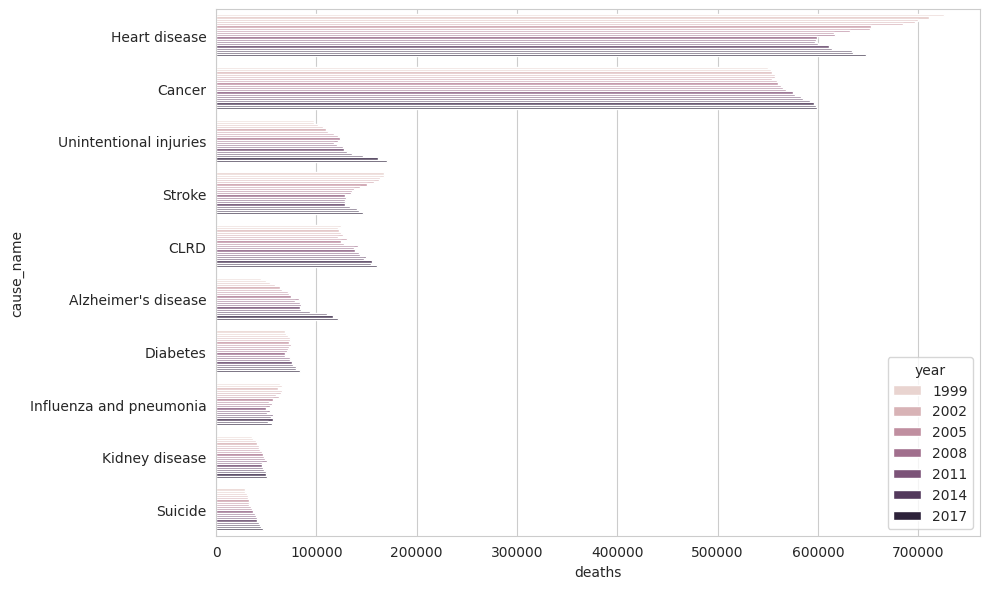

In [22]:
# Overview if United States sub-dataset
fig, ax = plt.subplots(figsize=(10,6))
leading = usa.groupby(['year', 'cause_name']).agg({'deaths':'mean'}). \
                       sort_values('deaths', ascending=False)
sns.barplot(data=leading, x='deaths', y='cause_name', hue='year')

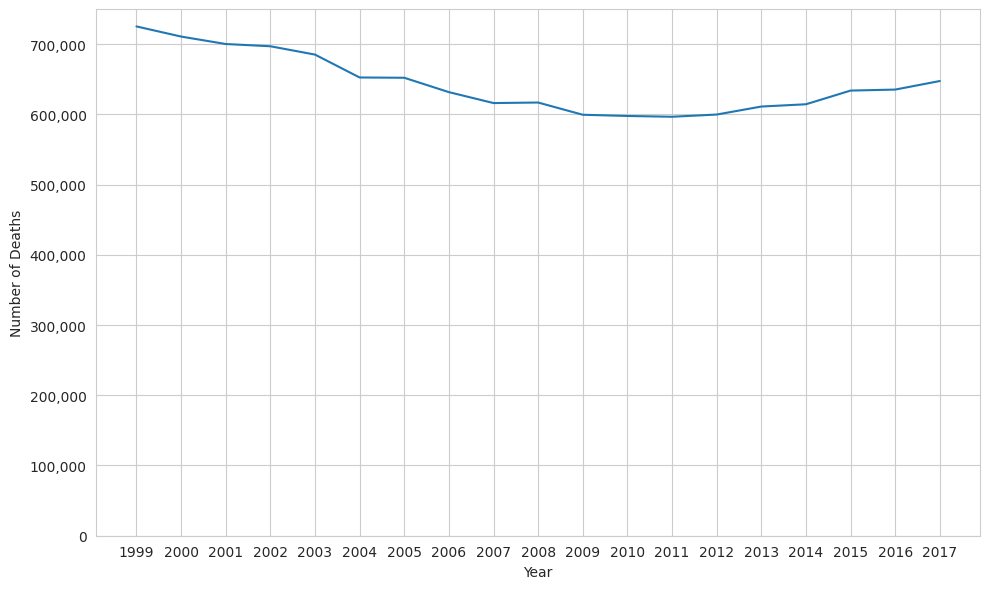

In [23]:
# Single out heart disease
crude = usa[usa.cause_name == 'Heart disease'].groupby('year').agg({'deaths':'mean'}). \
                                               sort_values('year')
fig, ax = plt.subplots(figsize=(10,6))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_ticks(np.arange(1999, 2018, 1))
ax.set(xlabel='Year', ylabel='Number of Deaths', ylim=(0,750000))
age = usa[usa.cause_name == 'Heart disease'].groupby('year').agg({'age_adjusted':'mean'}). \
                                             sort_values('year')
p = sns.lineplot(data=crude, x='year', y='deaths')
#p = sns.lineplot(data=age, x='year', y='age_adjusted')